<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=814c333c7047f3918d6770e4bfe5815c7a486d58b053eca562477860f5f65f64
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#07550755

3.888764608584831


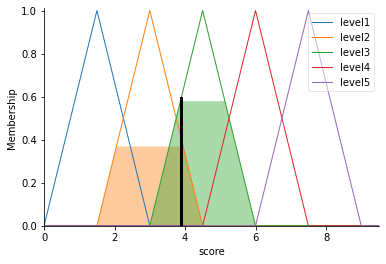

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,10,0.5),'taste')
envi = ctrl.Antecedent(np.arange(0,10,0.5),'envi')
budget = ctrl.Antecedent(np.arange(0,10,0.5),'budget')
user_review = ctrl.Antecedent(np.arange(0,10,0.5),'user_review')
location = ctrl.Antecedent(np.arange(0,10,0.5),'location')
score = ctrl.Consequent(np.arange(0,10,0.5),'score')
#Tạo membership tự động
taste_level=envi_level=budget_level=user_review_level=location_level=['less','medium','high']
taste.automf(names=taste_level)
envi.automf(names=envi_level)
budget.automf(names=budget_level)
user_review.automf(names=user_review_level)
location.automf(names=location_level)

#Tạo membership bằng tay
score['level1']=fuzz.trimf(score.universe,[0,1.5,3])
score['level2']=fuzz.trimf(score.universe,[1.5,3,4.5])
score['level3']=fuzz.trimf(score.universe,[3,4.5,6])
score['level4']=fuzz.trimf(score.universe,[4.5,6,7.5])
score['level5']=fuzz.trimf(score.universe,[6,7.5,9])

rule1=ctrl.Rule(taste['less']&envi['less']&budget['less']&user_review['less']&location['less'],score['level2'])
rule2=ctrl.Rule(taste['medium']&envi['less']&budget['less']&user_review['less']&location['less'],score['level2'])
rule3=ctrl.Rule(taste['medium']&envi['medium']&budget['less']&user_review['less']&location['less'],score['level3'])
rule4=ctrl.Rule(taste['medium']&envi['medium']&budget['medium']&user_review['less']&location['less'],score['level3'])
rule5=ctrl.Rule(taste['medium']&envi['medium']&budget['medium']&user_review['high']&location['less'],score['level3'])
rule6=ctrl.Rule(taste['high']&envi['medium']&budget['medium']&user_review['less']&location['less'],score['level4'])
rule7=ctrl.Rule(taste['medium']&envi['high']&budget['medium']&user_review['medium']&location['less'],score['level4'])
rule8=ctrl.Rule(taste['medium']&envi['high']&budget['high']&user_review['medium']&location['less'],score['level4'])
rule9=ctrl.Rule(taste['medium']&envi['high']&budget['medium']&user_review['high']&location['high'],score['level5'])
rule10=ctrl.Rule(taste['high']&envi['medium']&budget['high']&user_review['high']&location['high'],score['level5'])
rule11=ctrl.Rule(taste['high']&envi['high']&budget['high']&user_review['high']&location['high'],score['level5'])

# rule1.view()
score_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11])
score_out = ctrl.ControlSystemSimulation(score_ctrl)
score_out.input['taste']=3
score_out.input['envi']=3
score_out.input['budget']=2
score_out.input['user_review']=1
score_out.input['location']=1
score_out.compute()
print(score_out.output['score'])
score.view(sim = score_out)

In [ ]:
#